# **This NB is dedicated to analyze twitter data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime

from utils import*
plt.style.use('seaborn')

# Search using .Near = 'Santiago, Chile' for seven days.

In [28]:
seven_days = pd.read_csv('data/seven_days_tweets.csv')
seven_days = seven_days[['id', 'date', 'username', 'tweet']]
seven_days['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in seven_days['date']]

In [36]:
groupby = seven_days[['date', 'tweet']].groupby(['date']).count()
groupby

,tweet
date,
2021-01-03,2238
2021-01-04,11754
2021-01-05,11128
2021-01-06,13595
2021-01-07,12717
2021-01-08,11106
2021-01-09,10028
2021-01-10,9046


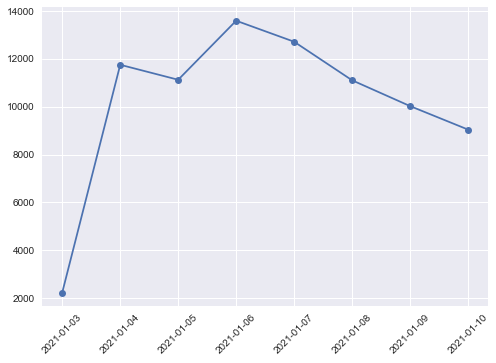

In [35]:
plt.plot(groupby.index, groupby['tweet'], '-o')
plt.xticks(rotation=45)
plt.show()

# **Search: .Geo (beaucheff, 10km) and dates from 'estallido'**

In [5]:
estallido = pd.read_csv('data/santiago_estallido.csv')
estallido[['id', 'date', 'tweet']].groupby('date').count()

,id,tweet
date,,
2019-10-14,1513,1513
2019-10-15,8444,8444
2019-10-16,8756,8756
2019-10-17,9657,9657
2019-10-18,12015,12015


In [6]:
# Se filtran los datos
estallido = estallido[['id', 'date', 'tweet']][estallido['date'] == '2019-10-18']
estallido.sample(5)

,id,date,tweet
5036,1185285980519047168,2019-10-18,@thecliniccl Hay que enviar un email
9241,1185185261317185537,2019-10-18,"@IvanMleon Ivan, hace años que canal 13 lava i..."
202,1185342638490312704,2019-10-18,También lo hice ...hágalo usted y callemos a e...
4976,1185286888137089024,2019-10-18,@metrodesantiago linea 5 esta funcionando
6611,1185255199100887041,2019-10-18,@carito1377 @Carolina_Toha No a la violencia a...


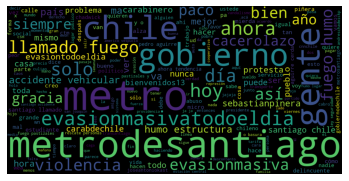

In [14]:
wordcloud_tweets(estallido, 'wordcloud_santiago_estallido1')

# **Search: .Geo = '(beaucheff, 10km)' and dates from 'inicio pandemia' and '8 de marzo'**

In [8]:
santiago_pandemia = pd.read_csv('data/santiago_inicio_pandemia.csv')[['id', 'date', 'tweet']]
santiago_pandemia.groupby('date').count()

,id,tweet
date,,
2020-03-07,1477,1477
2020-03-08,8827,8827


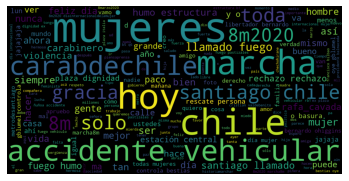

In [10]:
wordcloud_tweets(santiago_pandemia, 'wordcloud_santiago_8M.png')

# **Search: .Geo = '(beaucheff, 10km)' and dates from 'pero momento de la pandemia 10-15 junio'**

In [11]:
pandemia_worst = pd.read_csv('data/santiago_pandemia_junio.csv')[['id', 'date', 'tweet']]
pandemia_worst.sample(5)

,id,date,tweet
36244,1270547986196594691,2020-06-09,Fanaticos de Starwars Ahora en #BailandoPorUnS...
20854,1271228554320261122,2020-06-11,"@Cooperativa Y con que calidad moral, ética y ..."
6537,1271822981950582786,2020-06-13,"Buenos días #Cinefilos, necesito saber donde v..."
35874,1270558526679769088,2020-06-09,@Madurro_nicolas @senadornavarro Aprecio tus p...
29319,1270865676677328896,2020-06-10,@Tocomples316 🤢


In [12]:
pandemia_worst.groupby('date').count()

,id,tweet
date,,
2020-06-09,2060,2060
2020-06-10,8368,8368
2020-06-11,8640,8640
2020-06-12,9807,9807
2020-06-13,8851,8851


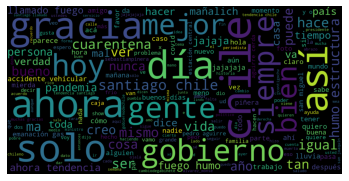

In [13]:
wordcloud_tweets(pandemia_worst, 'wordcloud_santiago_pandemia_worst.png')

# **Search: .Geo = '(beaucheff, 15km)', dates from 'votaciones constituyentes' and .Min_likes, .Min_retweets > 100**

In [2]:
votaciones = pd.read_csv('data/14_18_mayo.csv')[['username', 'date', 'tweet', 'retweets_count', 'likes_count']]
print(votaciones.columns)
votaciones.groupby('date').count()

Index(['username', 'date', 'tweet', 'retweets_count', 'likes_count'], dtype='object')


,username,tweet,retweets_count,likes_count
date,,,,
2021-05-13,6,6,6,6
2021-05-14,16,16,16,16
2021-05-15,22,22,22,22
2021-05-16,35,35,35,35


In [3]:
for index, row in votaciones.iterrows():
    print(row['username'], row['retweets_count'], row['likes_count'])

romartinezc 1072 4333
alvarogoo 683 2154
mabelinda 229 1040
mabelinda 171 256
bartolodelponi 568 2803
luis_a_riveros 394 754
andresaguirre78 174 550
carlossassarini 184 277
clauchileno 326 579
danieldxmen 383 1120
josemezapereira 494 1609
totiorellanag 489 733
mariseka 210 514
ileyton_md 167 773
chileyaac 162 584
elchedelosgays 288 730
ferezmanuel 264 651
totiorellanag 308 590
gianninabasso 275 547
claudiadides 759 2400
alota_silva 181 333
poliiigonzalez 1094 1150
realhenryboys 289 1402
claudiadides 371 910
marioestay1962 195 225
dlirio 190 462
realhenryboys 339 773
luis_a_riveros 941 2139
nella_v 1958 4439
andresaguirre78 438 1645
realhenryboys 1769 4982
realhenryboys 252 396
crisvelasquezm 978 6120
carvallocuevas 351 419
pesadillitas 190 348
josemezapereira 622 1122
dramlcordero 519 1983
realhenryboys 256 573
romartinezc 1072 4333
alvarogoo 683 2154
gastonrmone 260 4534
mabelinda 229 1040
mabelinda 171 256
bartolodelponi 568 2803
luis_a_riveros 394 754
andresaguirre78 174 550
carloss

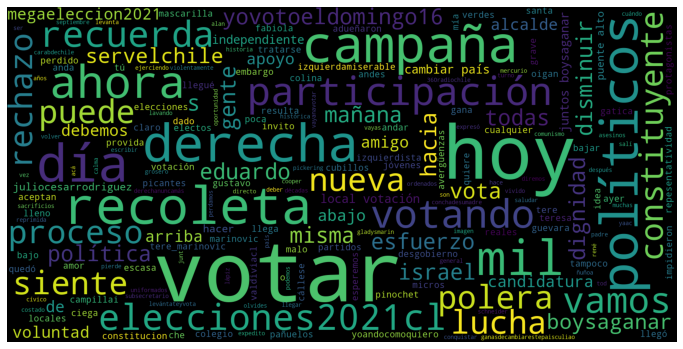

In [4]:
from utils import *
wordcloud_tweets(df = votaciones, file_name = '', save = False)

# **Search: .Near = 'Santaigo, Chile', dates from 'votaciones constituyentes' and .Min_likes > 10**

In [2]:
votaciones = pd.read_csv('data/14_18_mayo_10.csv')[['username', 'date', 'tweet', 'retweets_count', 'likes_count']]
print(votaciones.columns)
votaciones.groupby('date').count()

Index(['username', 'date', 'tweet', 'retweets_count', 'likes_count'], dtype='object')


,username,tweet,retweets_count,likes_count
date,,,,
2021-05-13,63,63,63,63
2021-05-14,256,256,256,256
2021-05-15,383,383,383,383
2021-05-16,358,358,358,358


In [3]:
for index, row in votaciones.iterrows():
    if row['likes_count'] < 10: print(index, 'tweet con < 10 likes')

856 tweet con < 10 likes


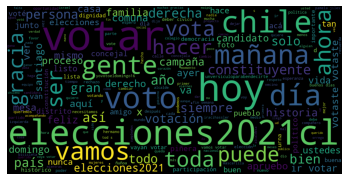

In [15]:
wordcloud_tweets(df = votaciones, file_name = 'wordcloud_chile_votaciones', save = True)

# **Search: .Near = 'Santiago, Chile', dates from '2020 entero' and .Search = 'pinera'**

In [8]:
pinera = pd.read_csv('data/santiago_pinera_2020.csv')[['username', 'date', 'tweet']]
pinera['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in pinera['date']]
pinera.groupby('date').count()

,username,tweet
date,,
2019-12-31,10,10
2020-01-01,57,57
2020-01-02,41,41
2020-01-03,81,81
2020-01-04,58,58
...,...,...
2020-12-25,45,45
2020-12-26,40,40
2020-12-27,47,47


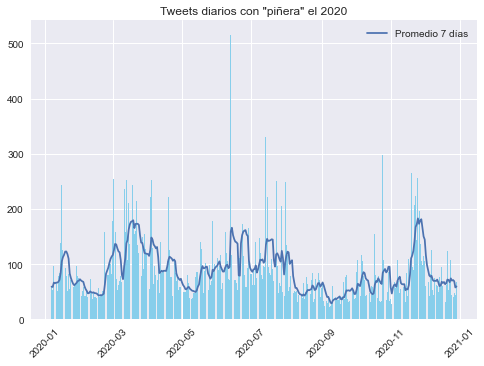

In [22]:
group_pinera = pinera.groupby('date').count() 
plt.plot(group_pinera.index[7:], group_pinera['tweet'].rolling(window=7).mean()[7:], label='Promedio 7 días')
plt.bar(group_pinera.index[7:], group_pinera['tweet'][7:], color='skyblue')
plt.title('Tweets diarios con "piñera" el 2020')
plt.legend()
plt.xticks(rotation=45)
plt.show()

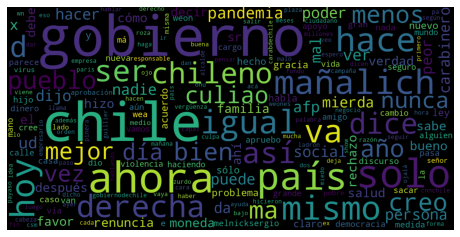

In [25]:
wordcloud_tweets(df = pinera, file_name = 'wordcloud_santiago_pinera_2020', save = False, forbidden_words=['piñera'])

# **Search: .Near = 'Santiago, Chile', dates from '2020' and .Search = 'covid'**

In [2]:
covid_2020 = pd.read_csv('data/santiago_covid_2020.csv')[['date', 'tweet']]
covid_2020['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in covid_2020['date']]
covid_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    39786 non-null  datetime64[ns]
 1   tweet   39786 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 621.8+ KB


In [3]:
groupby = covid_2020[covid_2020['date'] <= datetime.datetime(2021,5,1)].groupby('date').count()

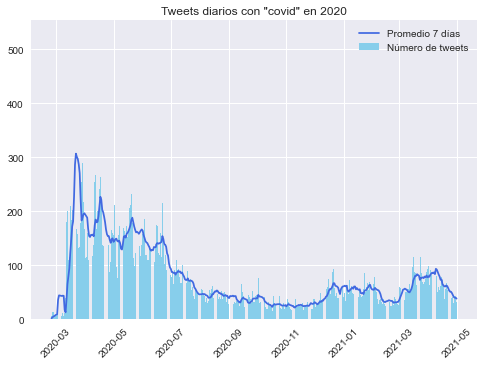

In [5]:
plt.bar(groupby.index[7:], groupby['tweet'][7:], color='skyblue', label='Número de tweets')
plt.plot(groupby.index[7:], groupby.rolling(window=7).mean()[7:], label='Promedio 7 días', color='royalblue')
plt.title('Tweets diarios con "covid" en 2020')
plt.legend()
plt.xticks(rotation=45)
#plt.savefig('imgs/serie_covid_2020.png')
plt.show()

In [30]:
# Máximo: Timestamp('2020-03-21 00:00:00')
#for i, row in covid_2020[covid_2020['date'] == datetime.datetime(2020,3,21)].iterrows():
#    print(row['tweet'])
#covid_2020.iloc[36859]['tweet']

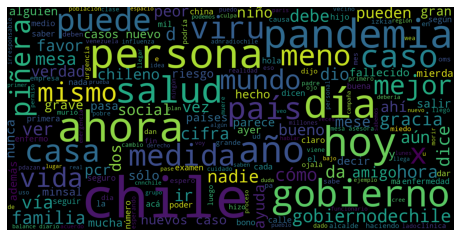

In [43]:
wordcloud_tweets(df = covid_2020, file_name = 'wordcloud_santiago_covid_2020', save = False, forbidden_words=['covid'])

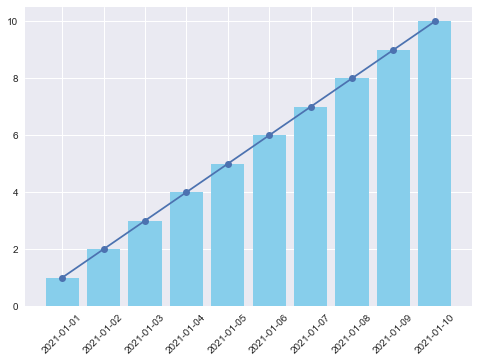

In [52]:
dates = pd.date_range('2021-01-01', freq='D', periods=10)
plt.bar(dates, range(1, 11), color='skyblue')
plt.plot(dates, range(1, 11), '-o')
plt.xticks(rotation=45)
plt.show()

# **Search: .Near = 'Santiago, Chile', dates from '2020' and .Search = 'jadue'**

In [5]:
jadue_2020 = pd.read_csv('data/santiago_jadue_2020.csv')[['username', 'date', 'tweet']]
jadue_2020['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in jadue_2020['date']]
jadue_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  11971 non-null  object        
 1   date      11971 non-null  datetime64[ns]
 2   tweet     11971 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 280.7+ KB


In [6]:
jadue_groupby = jadue_2020[jadue_2020['date'] <= datetime.datetime(2021,5,1)].groupby('date').count()

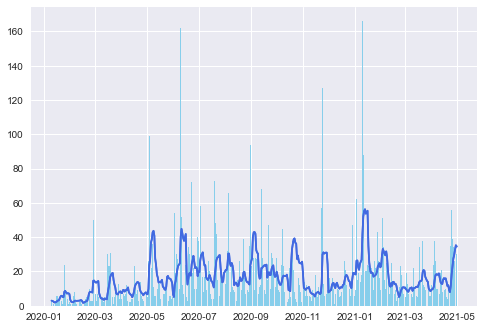

In [7]:
plt.bar(jadue_groupby.index[7:], jadue_groupby['tweet'][7:], color='skyblue')
plt.plot(jadue_groupby.index[7:], jadue_groupby.rolling(window=7).mean()[7:], color='royalblue')

# **Search: .Near = 'Santiago, Chile', dates from '2020' and .Search = 'jadue'**

In [8]:
lavin_2020 = pd.read_csv('data/santiago_lavin_2020.csv')[['date', 'tweet']]
lavin_2020['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in lavin_2020['date']]
lavin_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8087 non-null   datetime64[ns]
 1   tweet   8087 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 126.5+ KB


In [9]:
lavin_groupby = lavin_2020[lavin_2020['date'] <= datetime.datetime(2021,5,1)].groupby('date').count()

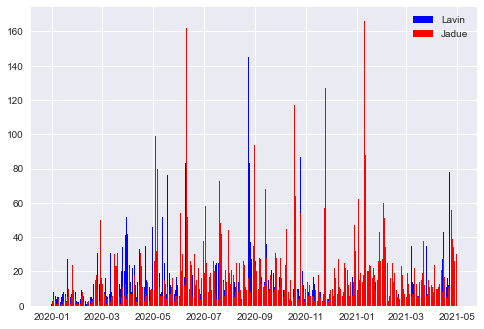

In [10]:
plt.bar(lavin_groupby.index, lavin_groupby['tweet'], color='blue', label='Lavin')
plt.bar(jadue_groupby.index, jadue_groupby['tweet'], color='red', label='Jadue')
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

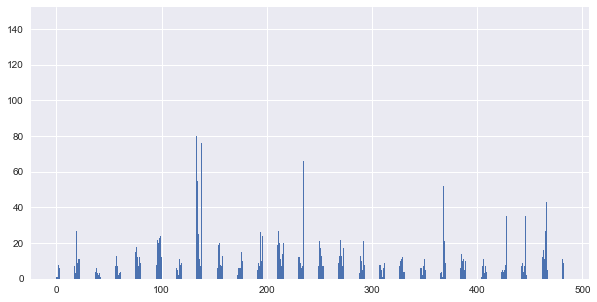

In [11]:
import numpy as np

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = lavin_groupby['tweet'].values
# Specify the values of orange bars (height)
orange_bar = jadue_groupby['tweet'].values

# Position of bars on x-axis
ind = np.arange(len(lavin_groupby['tweet']))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')

#plt.xticks(ind + width / 2, jadue_groupby.index)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()